**AIVLE School 미니프로젝트**
### **네비게이션 주행데이터를 이용한 <span style="color:darkgreen">도착시각</span> 예측 문제**
---

<br>

#### **<span style="color:red">[미션 안내]</span>**
* 네비게이션 주행데이터를 읽어들여 데이터를 분석 및 전처리한 후 머신러닝과 딥러닝으로 도착시각을 예측하고 결과를 분석하세요.

#### **<span style="color:red">[유의 사항]</span>**
* 각 문항의 답안코드는 반드시 '#여기에 답안코드를 작성하세요'로 표시된 cell에 작성해야 합니다.
* 제공된 cell을 추가/삭제하고 다른 cell에 답안코드를 작성 시 채점되지 않습니다.
* 반드시 문제에 제시된 가이드를 읽고 답안 작성하세요.
* 문제에 변수명이 제시된 경우 반드시 해당 변수명을 사용하세요.
* 문제와 데이터는 제3자에게 공유하거나 개인적인 용도로 사용하는 등 외부로 유출할 수 없으며 유출로 인한 책임은 응시자 본인에게 있습니다.

<br>

### 1. scikit-learn 패키지는 머신러닝 교육을 위한 최고의 파이썬 패키지입니다.
### scikit-learn를 별칭(alias) sk로 임포트하는 코드를 작성하고 실행하세요.

In [1]:
# 여기에 답안코드를 작성하세요.
import sklearn as sk

<br>

### 2. Pandas는 데이터 분석을 위해 널리 사용되는 파이썬 라이브러리입니다.
### Pandas를 사용할 수 있도록 별칭(alias)을 pd로 해서 불러오세요.

In [2]:
# 여기에 답안코드를 작성하세요.
import pandas as pd

<br>

### 3. 모델링을 위해 분석 및 처리할 데이터 파일을 읽어오려고 합니다.
### Pandas함수로 데이터 파일을 읽어 데이터프레임 변수명 df에 할당하는 코드를 작성하세요.
* A0007IT.json 파일을 읽어 데이터 프레임 변수명 df에 할당하세요.

In [3]:
# 여기에 답안코드를 작성하세요.
df = pd.read_json("A0007IT.json", encoding = "cp949")

<br>

### 4. Address1(주소1)에 대한 분포도를 알아 보려고 합니다.
### Address1(주소1)에 대해 countplot그래프로 만들고 아래 가이드에 따라 답하세요.
* Seaborn을 활용하세요.
* 첫번째, Address1(주소1)에 대해서 분포를 보여주는 countplot그래프 그리세요.
* 두번째, 지역명이 없는 '-'에 해당되는 row(행)을 삭제하세요.

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

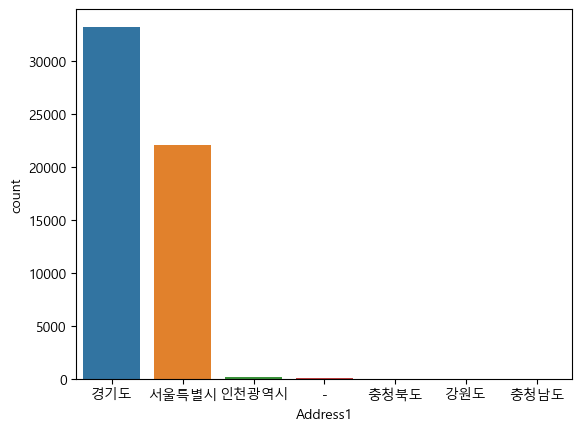

In [5]:
# 여기에 답안코드를 작성하세요.
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x = 'Address1', data = df)
plt.show()

df.drop(df[df['Address1'] == '-'].index, inplace = True)

<br>

### 5. 실주행시간과 평균시속의 분포를 같이 확인하려고 합니다.
### Time_Driving(실주행시간)과 Speed_Per_Hour(평균시속)을 jointplot 그래프로 만드세요.
* Seaborn을 활용하세요.
* X축에는 Time_Driving(실주행시간)을 표시하고 Y축에는 Speed_Per_Hour(평균시속)을 표시하세요.

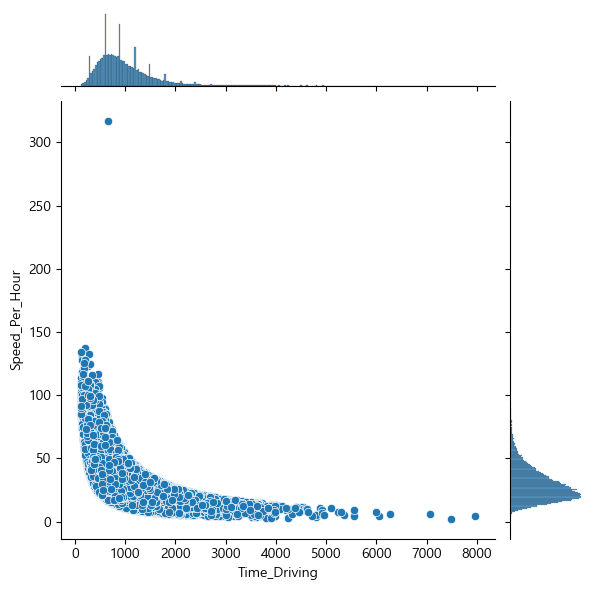

In [6]:
# 여기에 답안코드를 작성하세요.
sns.jointplot(x = "Time_Driving", y = "Speed_Per_Hour", data = df)
plt.show()

<br>

### 6. 위의 jointplot 그래프에서 시속 300이 넘는 이상치를 발견할 수 있습니다.
### jointplot 그래프에서 발견한 이상치 1개를 삭제하세요.
* 대상 데이터프레임: df
* jointplot 그래프를 보고 시속 300 이상되는 이상치를 찾아 해당 행(Row)을 삭제하세요.
* 전처리 반영 후에 새로운 데이터프레임 변수명 df_temp에 저장하세요.

In [7]:
# 여기에 답안코드를 작성하세요.
df_temp = df.drop(df[df['Speed_Per_Hour'] > 300].index)

<br>

### 7. 모델링 성능을 제대로 얻기 위해서 결측치 처리는 필수입니다.
### 아래 가이드를 따라 결측치 처리하세요.
* 대상 데이터프레임: df_temp
* 결측치를 확인하는 코드를 작성하세요.
* 결측치가 있는 행(raw)를 삭제 하세요.
* 전처리 반영된 결과를 새로운 데이터프레임 변수명 df_na에 저장하세요.

In [8]:
# 여기에 답안코드를 작성하세요.
print(df_temp.isnull().sum())
df_na = df_temp.dropna()
df_na.isnull().sum()

Time_Departure    0
Time_Arrival      0
Distance          2
Time_Driving      3
Speed_Per_Hour    5
Address1          0
Address2          0
Signaltype        0
Weekday           0
Hour              0
Day               0
dtype: int64


Time_Departure    0
Time_Arrival      0
Distance          0
Time_Driving      0
Speed_Per_Hour    0
Address1          0
Address2          0
Signaltype        0
Weekday           0
Hour              0
Day               0
dtype: int64

<br>

### 8. 모델링 성능을 제대로 얻기 위해서 불필요한 변수는 삭제해야 합니다.
### 아래 가이드를 따라 불필요 데이터를 삭제 처리하세요.
* 대상 데이터프레임: df_na
* 'Time_Departure', 'Time_Arrival' 2개 컬럼을 삭제하세요.
* 전처리 반영된 결과를 새로운 데이터프레임 변수명 df_del에 저장하세요.

In [9]:
# 여기에 답안코드를 작성하세요.
df_del = df_na.drop(columns = ['Time_Departure', 'Time_Arrival'])

<br>

### 9. 원-핫 인코딩(One-hot encoding)은 범주형 변수를 1과 0의 이진형 벡터로 변환하기 위하여 사용하는 방법입니다.
### 원-핫 인코딩으로 아래 조건에 해당하는 컬럼 데이터를 변환하세요.
* 대상 데이터프레임: df_del
* 원-핫 인코딩 대상: object 타입의 전체 컬럼
* 활용 함수: pandas의 get_dummies
* 해당 전처리가 반영된 결과를 데이터프레임 변수 df_preset에 저장해 주세요.

In [10]:
df_del.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55431 entries, 0 to 55530
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Distance        55431 non-null  float64
 1   Time_Driving    55431 non-null  float64
 2   Speed_Per_Hour  55431 non-null  float64
 3   Address1        55431 non-null  object 
 4   Address2        55431 non-null  object 
 5   Signaltype      55431 non-null  int64  
 6   Weekday         55431 non-null  int64  
 7   Hour            55431 non-null  int64  
 8   Day             55431 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 4.2+ MB


In [11]:
# 여기에 답안코드를 작성하세요.
oh_cols = ['Address1', 'Address2']
df_preset = pd.get_dummies(df_del, columns = oh_cols, drop_first = True)

<br>

### 10. 훈련과 검증 각각에 사용할 데이터셋을 분리하려고 합니다.
### Time_Driving(실주행시간) 컬럼을 label값 y로, 나머지 컬럼을 feature값 X로 할당한 후 훈련데이터셋과 검증데이터셋으로 분리하세요.
* 대상 데이터프레임: df_preset
* 훈련 데이터셋 label: y_train, 훈련 데이터셋 Feature: X_train
* 검증 데이터셋 label: y_valid, 검증 데이터셋 Feature: X_valid
* 훈련 데이터셋과 검증데이터셋 비율은 80:20
* random_state: 42
* Scikit-learn의 train_test_split 함수를 활용하세요.

In [12]:
# 여기에 답안코드를 작성하세요.
from sklearn.model_selection import train_test_split
x = df_preset.drop(columns = ['Time_Driving'])
y = df_preset['Time_Driving']
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 42)

<br>

### 11. Time_Driving(실주행시간)을 예측하는 머신러닝 모델을 만들려고 합니다.
### 의사결정나무(decision tree)는 여러 가지 규칙을 순차적으로 적용하면서 독립 변수 공간을 분할하는 모형으로
### 분류(classification)와 회귀 분석(regression)에 모두 사용될 수 있습니다.
### 의사결정나무(decision tree)로 학습을 진행하세요.
* 트리의 최대 깊이: 5로 설정
* 노드를 분할하기 위한 최소한의 샘플 데이터수(min_samples_split): 3로 설정
* random_state: 120로 설정

In [13]:
# 여기에 답안코드를 작성하세요.
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth = 5, min_samples_split = 3, random_state=120)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=3, random_state=120)

<br>

### 12. 위 의사결정나무(decision tree) 모델의 성능을 평가하려고 합니다.
### 예측 결과의 mae(Mean Absolute Error)를 구하세요.
* 성능 평가는 검증 데이터셋을 활용하세요.
* 11번 문제에서 만든 의사결정나무(decision tree) 모델로 y값을 예측(predict)하여 y_pred에 저장하세요.
* 검증 정답(y_valid)과 예측값(y_pred)의 mae(Mean Absolute Error)를 구하고 dt_mae 변수에 저장하세요.

In [14]:
# 여기에 답안코드를 작성하세요.
from sklearn.metrics import  mean_absolute_error
y_pred = tree.predict(X_valid)
dt_mae = mean_absolute_error(y_valid, y_pred)
print(dt_mae)

113.87838566407876


<br>

##### **<span style="color:red">다음 문항을 풀기 전에</span> 아래 코드를 실행하세요.**

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

tf.random.set_seed(1)

<br>

### 13. Time_Driving(실주행시간)을 예측하는 딥러닝 모델을 만들려고 합니다.
### 아래 가이드에 따라 모델링하고 학습을 진행하세요.
* Tensoflow framework를 사용하여 딥러닝 모델을 만드세요.
* 히든레이어(hidden layer) 2개이상으로 모델을 구성하세요.
* dropout 비율 0.2로 Dropout 레이어 1개를 추가해 주세요.
* 손실함수는 MSE(Mean Squared Error)를 사용하세요.
* 하이퍼파라미터 epochs: 30, batch_size: 16으로 설정해주세요.
* 각 에포크마다 loss와 metrics 평가하기 위한 데이터로 X_valid, y_valid 사용하세요.
* 학습정보는 history 변수에 저장해주세요

In [17]:
# 여기에 답안코드를 작성하세요.
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(87,)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])

es = EarlyStopping(monitor='val_loss', patience=5) 

checkpoint_path = 'best_model.keras'  # 파일 경로를 수정
mc = ModelCheckpoint(checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True)

history = model.fit(X_train, y_train, epochs=30, batch_size=16,
                   validation_data=(X_valid, y_valid),
                   callbacks=[es, mc]
                   )

Epoch 1/30
2759/2772 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 242170.2656 - mae: 349.2352 - mse: 242170.2656
Epoch 1: val_loss improved from inf to 115033.48438, saving model to best_model.keras
2772/2772 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 241892.3125 - mae: 348.9844 - mse: 241892.3125 - val_loss: 115033.4844 - val_mae: 221.4850 - val_mse: 115033.4844
Epoch 2/30
2740/2772 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 78707.8750 - mae: 179.7728 - mse: 78707.8750
Epoch 2: val_loss improved from 115033.48438 to 51142.87500, saving model to best_model.keras
2772/2772 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 78545.2656 - mae: 179.5876 - mse: 78545.2656 - val_loss: 51142.8750 - val_mae: 168.4705 - val_mse: 51142.8750
Epoch 3/30
2742/2772 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 38109.1641 - mae: 126.4597 - mse: 38109.1641
Epoch 3: val_loss improved from 51142.87500 to 31672.93164, saving model to best_model.keras
2772/2772 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 38054.7422 - mae: 126.3713 

<br>

### 14. 위 딥러닝 모델의 성능을 평가하려고 합니다.
### Matplotlib 라이브러리 활용해서 학습 mse와 검증 mse를 그래프로 표시하세요.
* 1개의 그래프에 학습 mse과 검증 mse 2가지를 모두 표시하세요.
* 위 2가지 각각의 범례를 'mse', 'val_mse'로 표시하세요.
* 그래프의 타이틀은 'Model MSE'로 표시하세요.
* X축에는 'Epochs'라고 표시하고 Y축에는 'MSE'라고 표시하세요.

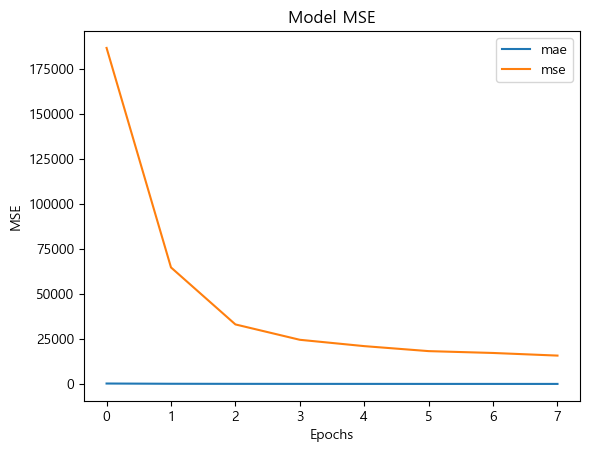

In [18]:
# 여기에 답안코드를 작성하세요.
plt.plot(history.history["mae"], label="mae")
plt.plot(history.history["mse"], label="mse")
plt.title("Model MSE")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()